In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pickle

pickle_in=open('/content/drive/MyDrive/ML_Results_Main/X_SVM_Img_Pre.pickle','rb')
X = np.array(pickle.load(pickle_in))
pickle_in.close()

pickle_in=open('/content/drive/MyDrive/ML_Results_Main/Preprocessing/Y_SVM_Img_Pre.pickle','rb')
Y = np.array(pickle.load(pickle_in))
pickle_in.close()

print("Number of images in dataset: " ,len(X))

X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.8, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)

X = 0  # To solve memory issue

image_size = X_train.shape[1]
input_size = image_size
print("Number of features in image: ", input_size)

X_train=np.reshape(X_train, [-1,input_size])
X_train=X_train.astype('float32')/255

X_test=np.reshape(X_test, [-1,input_size])
X_test=X_test.astype('float32')/255

svm = SVC(C = 8, kernel = 'linear')
history = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = svm.score(X_test, y_test)

print("Model Accuracy: ", accuracy*100,'%')

Number of images in dataset:  12540
Number of features in image:  42849
Model Accuracy:  78.4688995215311 %


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [ ]:
print("Classification report for classifier %s:\n%s\n" % (
    svm, classification_report(y_test, y_pred)))


Classification report for classifier SVC(C=8, kernel='linear'):
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       413
           1       0.78      0.95      0.85       841

    accuracy                           0.78      1254
   macro avg       0.79      0.70      0.72      1254
weighted avg       0.79      0.78      0.77      1254




In [ ]:
################# Confusion matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[189 224]
 [ 46 795]]

Model accuracy:  0.784688995215311


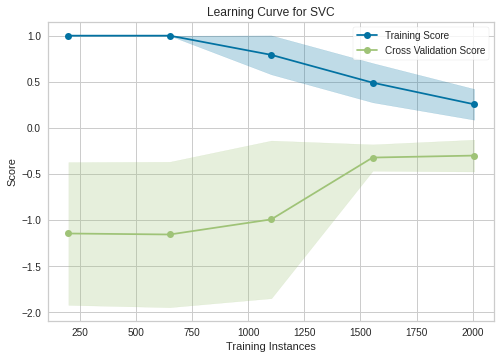

In [ ]:
# Learning curve
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(svm, scoring='r2')

visualizer.fit(np.append(X_valid, X_test, axis = 0),np.append(y_valid, y_test, axis = 0)) 
visualizer.show()

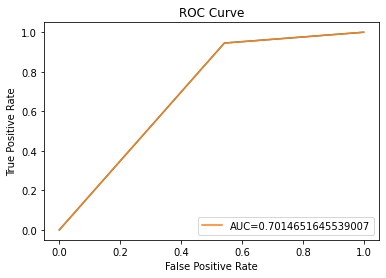

In [7]:
################## ROC Curve
y_pred = svm.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [4]:
fileName = "/content/drive/MyDrive/ML_Results_Main/SVM_Img_78.4.model"
pickle.dump(svm, open(fileName, 'wb'))